Authors: Aleks Siemenn (asiemenn@mit.edu) and Tonio Buonassisi
# The PV-Machine Learning Starter Kit

In [1]:
# import packages
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap
from BO import BO_optimizer

C:\Users\alexs\anaconda3\envs\pvml\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Input variables.

In [2]:
data_path                = os.getcwd() + '\\data\\Example_PV_Dataset.csv'     # directory path to data location
type_of_optimization     = 'max'                                              # either 'max' or 'min'
number_of_predictions    = 5                                                  # number of output predicted data points

### Prepare dataset.

In [3]:
df = pd.read_csv(data_path)
display(df)

,Temp [degC],speed [mm/s],sprayFL [uL/min],plasmaH [cm],gasFL [L/min],plasmaDC [%],PCE
0,155,200,5000,1.2,35,50,3.903996
1,155,200,5000,1.2,35,50,5.914137
2,135,200,2500,1.0,25,75,12.767302
3,135,200,2500,1.0,25,75,11.919493
4,135,200,2500,1.0,25,75,12.889485
...,...,...,...,...,...,...,...
342,150,175,3500,1.0,16,50,12.721000
343,145,125,3500,1.0,20,50,5.159000
344,145,125,3500,1.0,20,50,3.950000
345,145,125,3500,1.0,20,50,6.879000


### Plot dataset diagnostics.

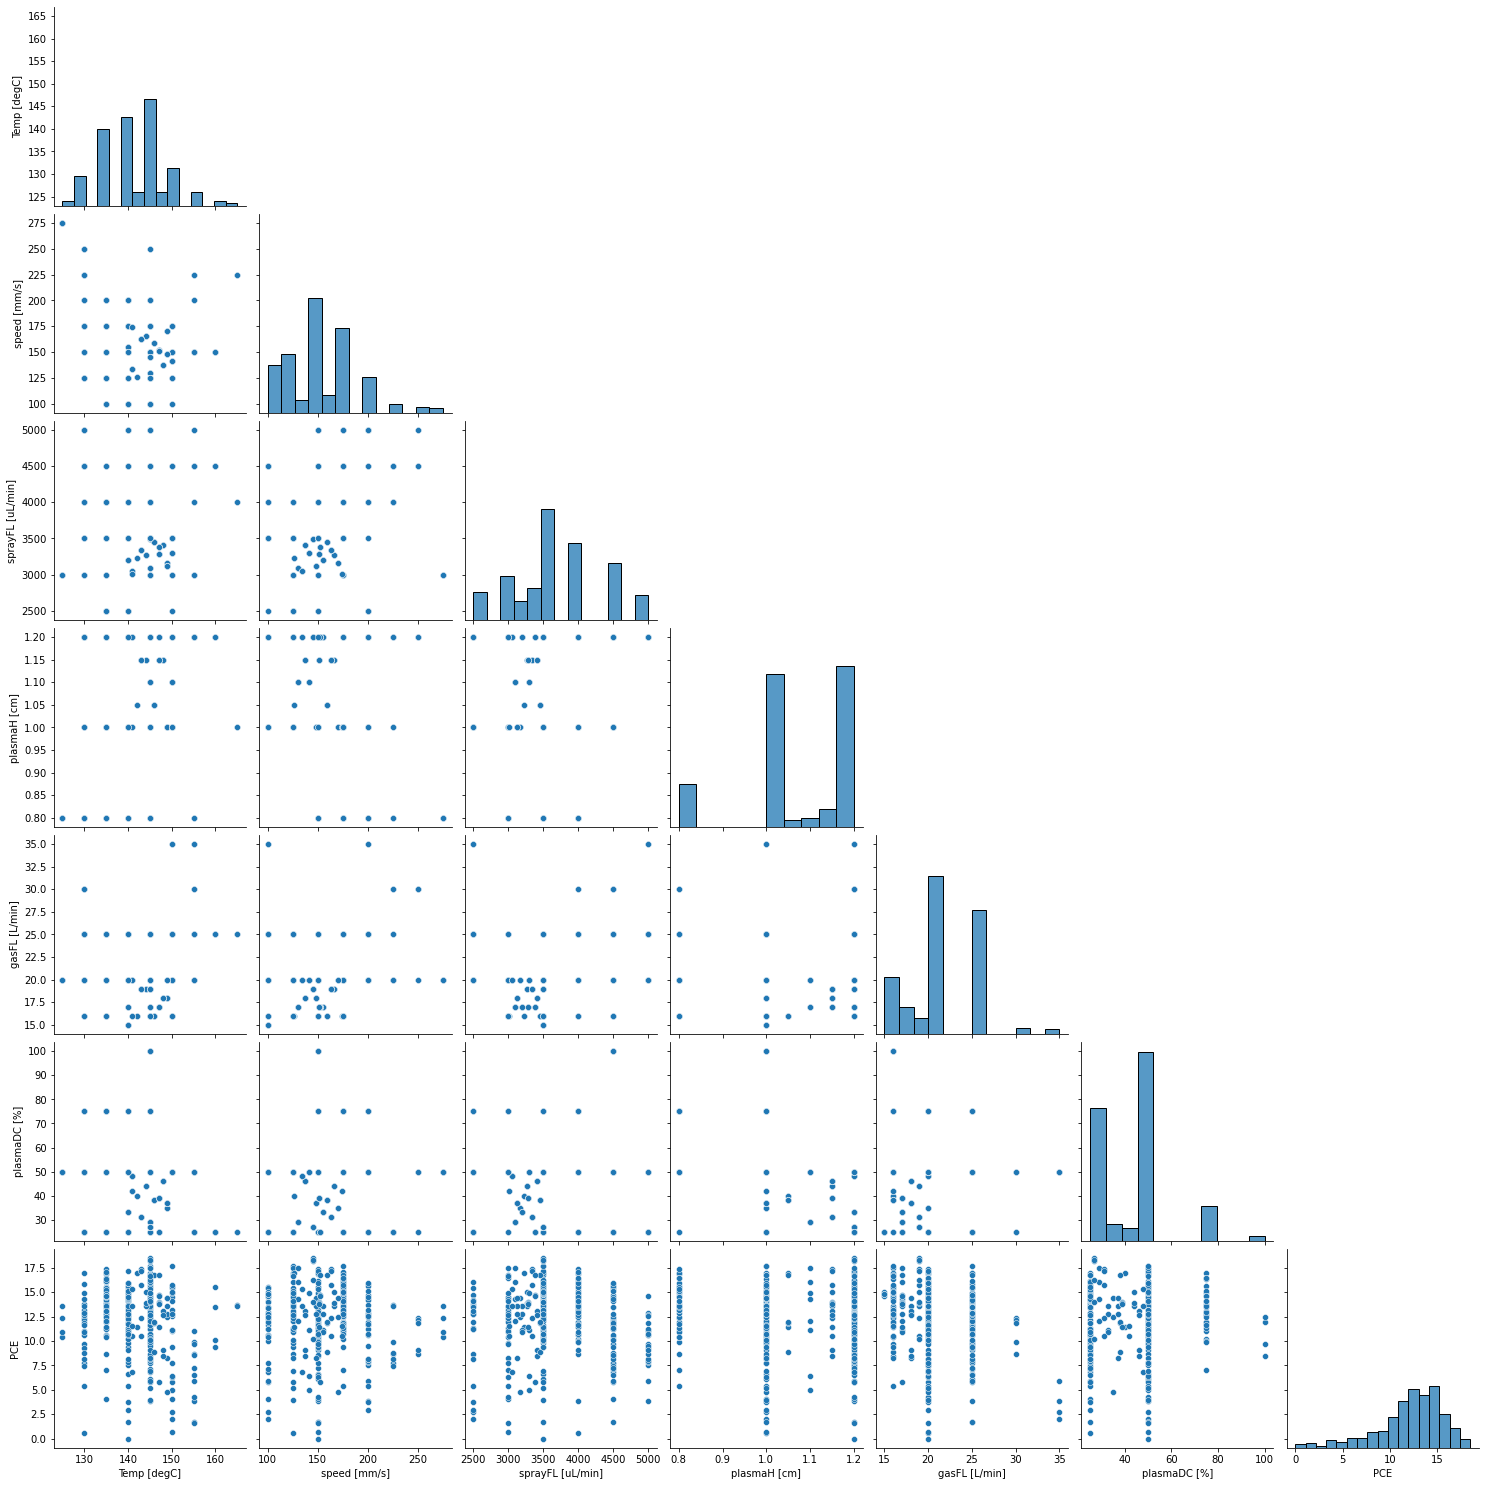

In [4]:
# Histograms
fig = sns.pairplot(df, height= 3)
for i, j in zip(*np.triu_indices_from(fig.axes, 1)):
    fig.axes[i, j].set_visible(False)

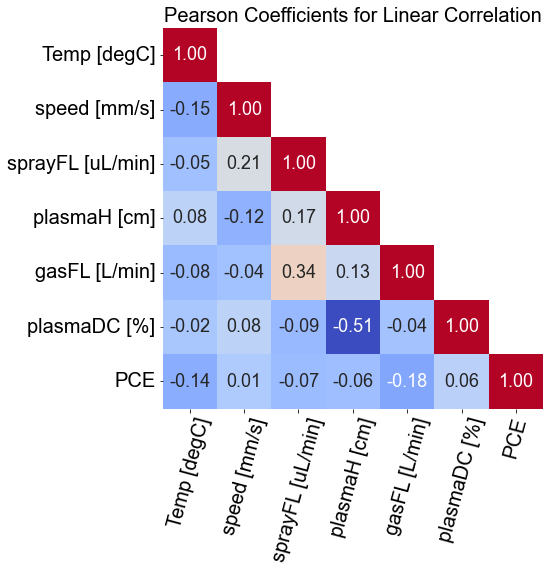

In [5]:
# Spearman correlation coefficient
corr = df.corr(method='spearman')#'spearman'
corr.columns = df.columns
df_len = len(df.columns)
fs = 20
fig, ax=plt.subplots(figsize=(df_len,df_len))
sns.set(font_scale=1.5)
sns.set_style("ticks",{'xtick.direction': 'in', # set the style of the plot using seaborn
                       'ytick.direction':'in',
                       'xtick.top': False,'ytick.right': False})
mask = np.triu(np.ones_like(corr, dtype=np.bool),k=1)
cmap = plt.get_cmap('coolwarm')
sns.heatmap(corr, mask = mask, cbar_kws={"shrink": .2}, annot=True, fmt='.2f', 
            cmap=cmap, cbar=False, ax=ax, square=True)
ax.set_xlim(0, df_len)
ax.set_ylim(df_len, 0)
ax.set_title("Pearson Coefficients for Linear Correlation", fontsize = 20)
plt.xticks(rotation=75, fontsize = fs)
plt.yticks(rotation=0, fontsize = fs) 
plt.show()

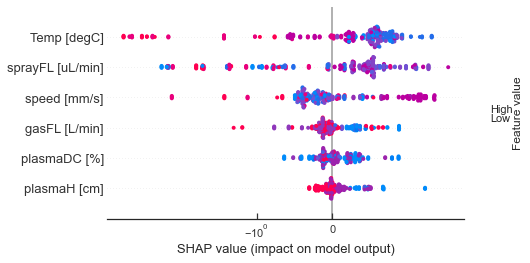

In [6]:
# Feature importance ranking
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
# Build the model with the random forest regression algorithm:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)
shap_values = shap.TreeExplainer(model).shap_values(X_train)
fig = plt.figure()
shap.summary_plot(shap_values, X_train,use_log_scale=True)


### Run Bayesian Optimization.

In [7]:
predictions = BO_optimizer(df, number_of_predictions, type_of_optimization)
print(f'New {number_of_predictions} predicted conditions.')
display(predictions)

New 5 predicted conditions.


,Suggested Temp [degC],Suggested speed [mm/s],Suggested sprayFL [uL/min],Suggested plasmaH [cm],Suggested gasFL [L/min],Suggested plasmaDC [%],Predicted PCE
0,149.204691,275.0,3952.742925,1.102564,15.0,25.000000,14.899297
1,149.222398,275.0,3958.059410,1.083491,15.0,37.590966,14.861962
2,165.000000,100.0,3874.888670,0.813837,15.0,100.000000,11.653047
3,149.204745,275.0,3952.762173,0.918737,15.0,25.000000,14.899236
4,149.227707,275.0,3979.232617,0.957684,15.0,35.904142,14.860689
